In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(caret)
library(corrplot)
library(dplyr)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


corrplot 0.92 loaded



[1] "titanic"                  "titanic-machine-learning"

# Purpose
The purpose of Project Assignment #4 is to use logistics regression to classify the given dataset to predict survival on the Titanic. The data has been split into three groups:

Training set (train.csv)
Test set (test.csv)
Gender_submission.csv

# Instructions
Use the following Titanic competition dataset:

Logistic Regression for Titanic Dataset Link opens in a new window

Write a script using R to classify the data using logistic regression. The training set should be used to build your machine learning models. For the training set, the outcome (also known as the "ground truth") is provided for each passenger. Your model will be based on "features" like passengers' gender and class.

The test set should be used to see how well your model performs on unseen data. For the test set, you will not be provided with the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

There is also a gender_submission.csv file that is a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Submission:
Please provide one file of R code with detailed comments on each step. Submit your file to Dropbox.

# How You Will Be Evaluated
The evaluation is based on the following considerations:

R Code Writing
Visualizations
Results Analysis


# Load Data

In [2]:
# Load training data from a CSV file into 'log_data'.
log_data <- read.csv("/kaggle/input/titanic/train.csv")

# Load test data from a CSV file into 'test_data'.
test_data <- read.csv("/kaggle/input/titanic/test.csv")





# Data Exploration
## Log or Training Data
We are exploring dataframe dimensions and variables

In [3]:
# Display variable names in the dataset
names(log_data)

# Show the dimensions of the dataset (number of rows and columns)
dim(log_data)

# Display structure (column types, sample data) 
str(log_data)

# Summarize the dataset to understand its structure and characteristics
summary(log_data)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

[1] 891  12

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## Test Data


In [4]:
# Display variable names in the dataset
names(test_data)


# Display structure (column types, sample data) 
str(test_data)


# Summarize the dataset to understand its structure and characteristics
summary(test_data)


[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...


  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

# Missing Values
I can write about missing data here

In [5]:
# Check for missing values in each column of 'log_data' and 'test_data'.
apply(log_data, 2, function(x) any(is.na(x)))
apply(test_data, 2, function(x) any(is.na(x)))



PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE        TRUE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE

PassengerId      Pclass        Name         Sex         Age       SibSp 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE 
      Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE        TRUE       FALSE       FALSE

# Handling Missing Data: Imputing Age and Fare Values 

Missing values in the 'Age' and 'Fare' variables are addressed through imputation. Missing 'Age' values in both the 'log_data' and 'test_data' datasets are replaced with the mean age, while missing 'Fare' values in the 'test_data' dataset are similarly substituted with the mean fare. Imputation ensures completeness of the dataset, facilitating accurate analysis and modeling.

This is a new comment in version 37


In [6]:
# Fill missing 'Age' values in 'log_data' and 'test_data' with the mean age.
log_data$Age[is.na(log_data$Age)] <- mean(log_data$Age, na.rm = TRUE)
test_data$Age[is.na(test_data$Age)] <- mean(test_data$Age, na.rm = TRUE)

# Fill missing 'Fare' values in 'test_data' with the mean fare.
test_data$Fare[is.na(test_data$Fare)] <- mean(test_data$Fare, na.rm = TRUE)

# Discovering Variable Types
## Log Data
* PassengerId: A unique identifier for each passenger, with 891 distinct values.
* Survived: Indicates whether a passenger survived (1) or not (0), with 2 unique values.
* Pclass: Represents the passenger class (1st, 2nd, 3rd), with 3 unique values.
* Name: The name of each passenger, with 891 distinct values.
* Sex: Gender of each passenger, with 2 unique values.
* Age: Age of each passenger, with 89 distinct values.
* SibSp: Number of siblings/spouses aboard, with 7 unique values.
* Parch: Number of parents/children aboard, with 7 unique values.
* Ticket: Ticket number for each passenger, with 681 distinct values.
* Fare: Fare paid by each passenger, with 248 distinct values.
* Cabin: Cabin number for each passenger, with 148 distinct values.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton), with 4 unique values.


*This is italisized*

In [7]:
# Get the class/type of each variable in the log_data dataframe
sapply(log_data, class)

# Count the number of unique values for each variable in the log_data dataframe
sapply(log_data, function(x) length(unique(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
  "integer"   "integer"   "integer" "character" "character"   "numeric" 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
  "integer"   "integer" "character"   "numeric" "character" "character"

PassengerId    Survived      Pclass        Name         Sex         Age 
        891           2           3         891           2          89 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          7           7         681         248         148           4

## Test Data

Test Data:

Consists of passenger information similar to the log data, including attributes like PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.
* Comprises 418 entries, each corresponding to a passenger, with a distinct PassengerId assigned to every entry.
* Data types for attributes mirror those in the log data, facilitating consistency and compatibility in analysis or predictive modeling tasks.



In [8]:
# Get the class/type of each variable in the test_data dataframe
sapply(test_data, class)

# Count the number of unique values for each variable in the test_data dataframe
sapply(test_data, function(x) length(unique(x)))

PassengerId      Pclass        Name         Sex         Age       SibSp 
  "integer"   "integer" "character" "character"   "numeric"   "integer" 
      Parch      Ticket        Fare       Cabin    Embarked 
  "integer" "character"   "numeric" "character" "character"

PassengerId      Pclass        Name         Sex         Age       SibSp 
        418           3         418           2          80           7 
      Parch      Ticket        Fare       Cabin    Embarked 
          8         363         170          77           3

# Data Conversion


In [9]:
# Display the data structure of 'log_data' and 'test_data' to check variable types.
str(log_data)
str(test_data)

# Convert specified columns in 'log_data' to categorical data types (factors).
log_data[, c("Survived", "Pclass", "Sex", "Embarked")] <- lapply(log_data[, c("Survived", "Pclass", "Sex", "Embarked")], factor)

# Convert specified columns in 'test_data' to categorical data types (factors).
test_data[, c( "Pclass", "Sex", "Embarked")] <- lapply(test_data[, c( "Pclass", "Sex", "Embarked")], factor)

# Display the updated data structure of 'log_data' and 'test_data' after conversion.
str(log_data)
str(test_data)




'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas 

# Exploring Predictor Relationships: Pairwise Correlations and Multicollinearity

In our dataset, we evaluated the potential for Logistic Regression by analyzing correlations among numeric variables. 
Key findings:
- **Age**: Weak negative correlation with SibSp (-0.2326) and Parch (-0.1792), weak positive correlation with Fare (0.0916).
- **SibSp**: Weak negative correlation with Age (-0.2326), positive correlation with Parch (0.4148) and Fare (0.1597).
- **Parch**: Weak negative correlation with Age (-0.1792), positive correlation with SibSp (0.4148) and Fare (0.2162).
- **Fare**: Weak positive correlation with Age (0.0916), SibSp (0.1597), and Parch (0.2162).

Multicollinearity: There is potential multicollinearity between SibSp and Parch due to their moderate positive correlation (0.4148). However, the correlations with other variables are weak, indicating low multicollinearity concerns overall.

In [10]:

# Select only the numeric variables (excluding 'PassengerId')
numeric_data <- select_if(log_data, is.numeric) %>% select(-PassengerId)

# Compute the correlation matrix
correlation_matrix <- cor(numeric_data)

# Print the correlation matrix
print(correlation_matrix)


              Age      SibSp      Parch       Fare
Age    1.00000000 -0.2326246 -0.1791909 0.09156609
SibSp -0.23262459  1.0000000  0.4148377 0.15965104
Parch -0.17919092  0.4148377  1.0000000 0.21622494
Fare   0.09156609  0.1596510  0.2162249 1.00000000


# Visualization between Fare and Passenger Class


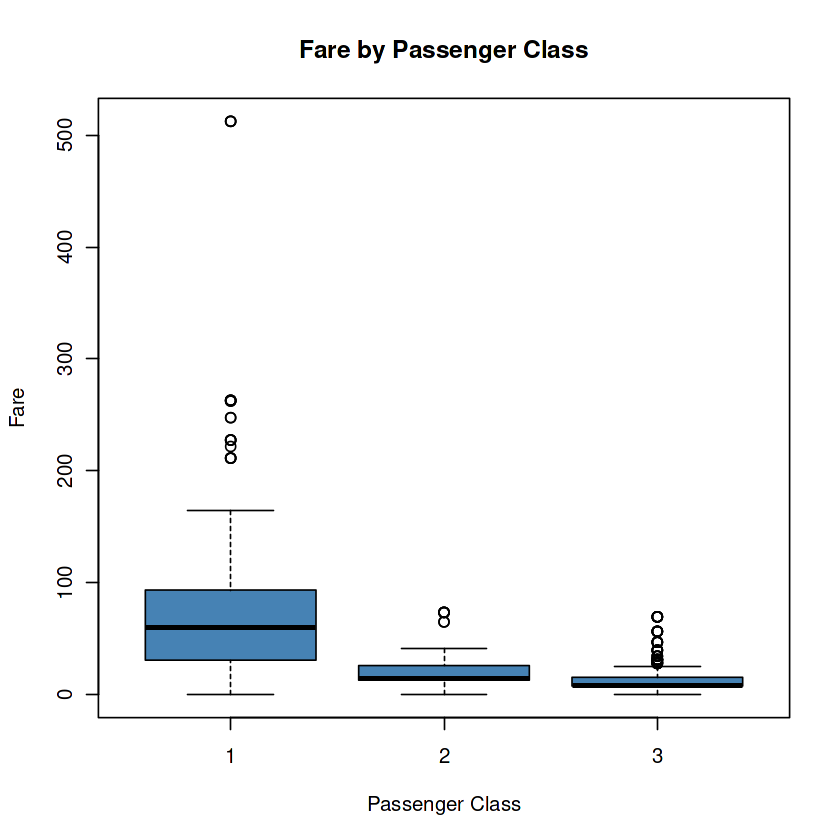

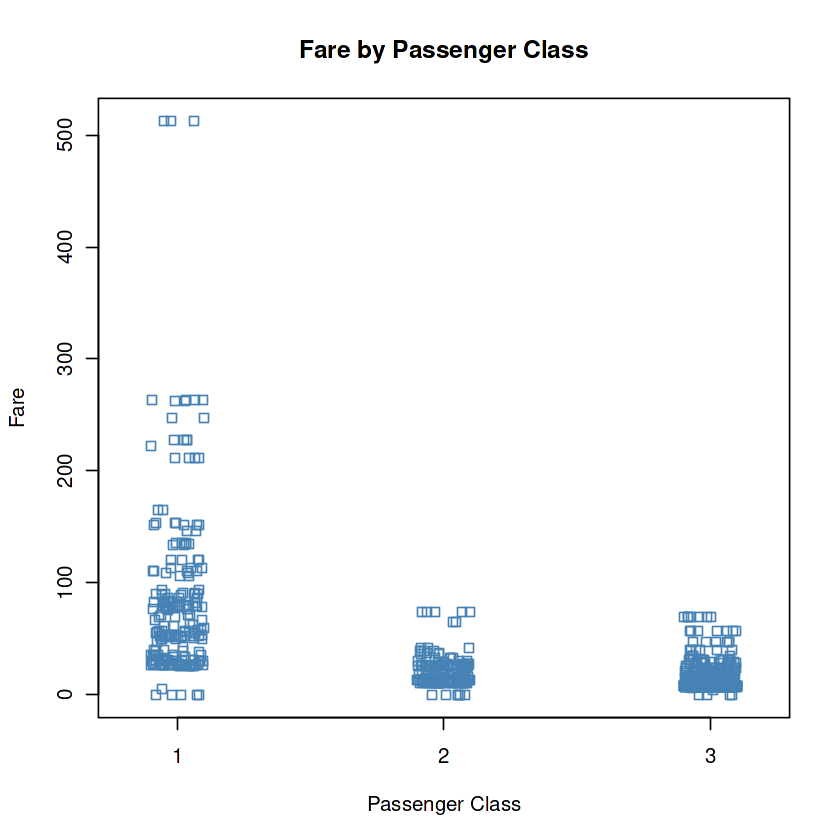

In [11]:
plot(
  log_data$Fare ~ log_data$Pclass,      # Plotting "Fare" against "Pclass"
  data = log_data,                      # Data frame containing the variables
  main = "Fare by Passenger Class",     # Title of the plot
  xlab = "Passenger Class",             # X-axis label
  ylab = "Fare",                        # Y-axis label
  col = "steelblue"                     # Dot color
)

# Stripchart:
# Create a stripchart to visualize the relationship between "Fare" and "Pclass"
stripchart(
  log_data$Fare ~ log_data$Pclass,     # Plotting "Fare" against "Pclass"
  method = "jitter",                    # Add jitter to avoid overlapping points
  vertical = TRUE,                      # Plot vertically
  main = "Fare by Passenger Class",     # Title of the plot
  xlab = "Passenger Class",             # X-axis label
  ylab = "Fare",                        # Y-axis label
  col = "steelblue"                       # Dot color
)




# Clean and Streamline data
We removed "Name," "Ticket," "PassengerId," and "Cabin" because they contained individual identifiers or redundant features. For example, "Name" and "PassengerId" had unique identifiers for each observation, resulting in 891 distinct values. "Cabin" and "Ticket" also had unique identifiers associated with each observation. Additionally, 

"Fare" was removed due to its  relationship with "Pclass," which could affect model stability and interpretability. This streamlining of the dataset improves its quality for analysis and modeling.

In [12]:
# Remove specified variables from log_data
log_data <- log_data[, !(names(log_data) %in% c("Name", "Ticket","Cabin", "PassengerId", "Fare"))]

# Remove specified variables from test_data
test_data<- test_data[, !(names(test_data) %in% c("Name", "Ticket","Cabin", "PassengerId", "Fare"))]

# Visualize Data

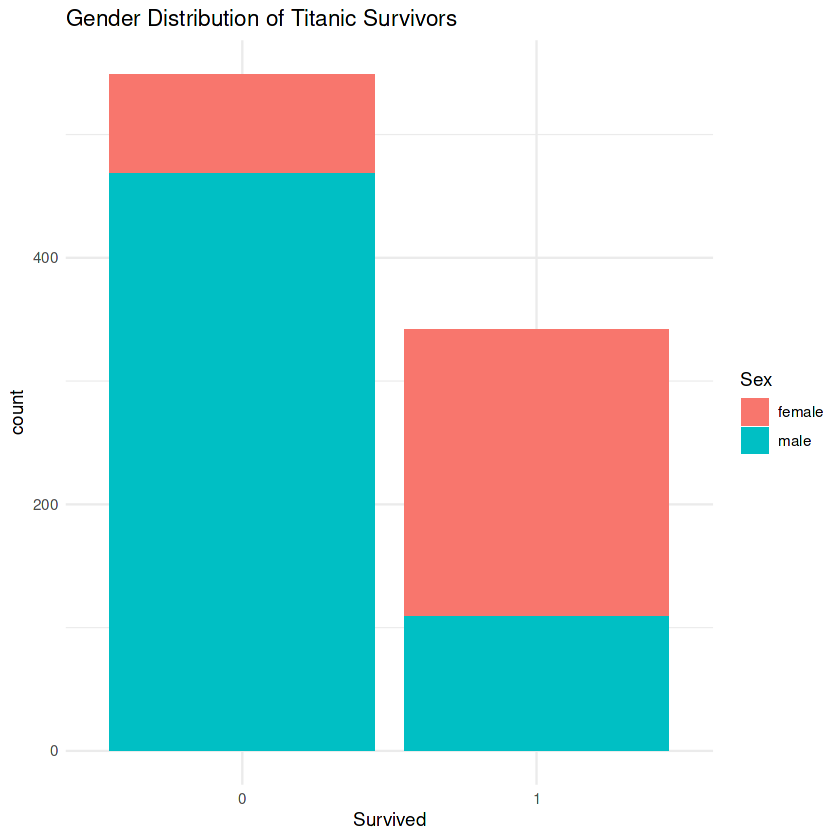

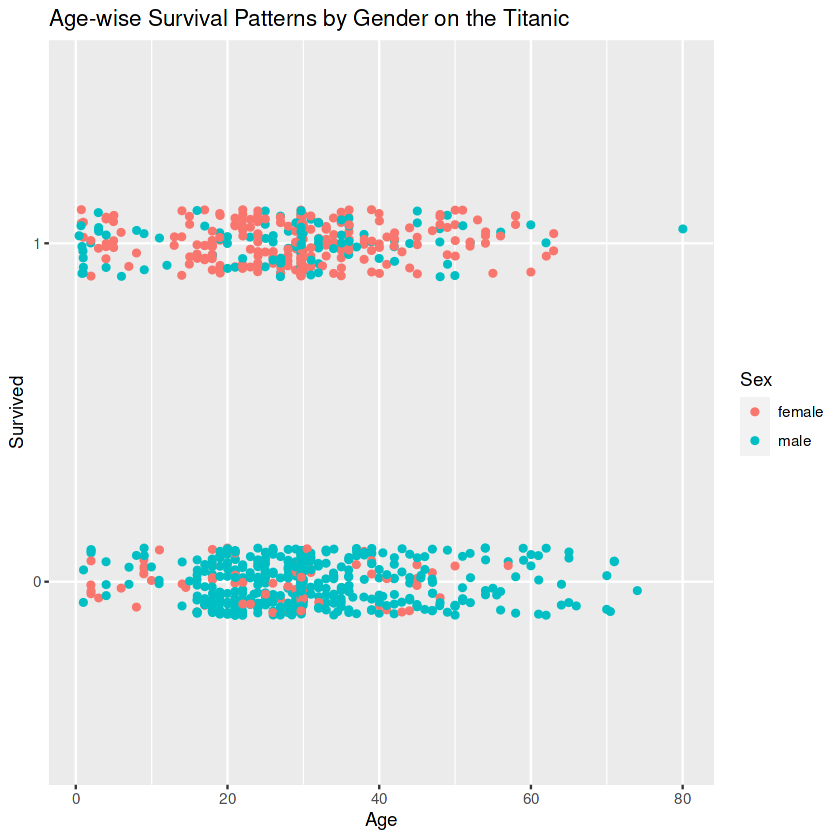

In [13]:
# Create a bar plot of survival count by sex in 'log_data' using ggplot2.
log_data %>%
  ggplot(aes(Survived, fill=Sex)) +
  geom_bar() +
  theme_minimal() +
  labs(title="Gender Distribution of Titanic Survivors")

# Set a seed for reproducibility in random processes.
set.seed(123)

# Create a jitter plot to visualize the relationship between age, survival, and sex in 'log_data'.
log_data %>%
  ggplot(aes(Age, Survived, col=Sex)) +
  geom_jitter(height = 0.1) +
  labs(title = "Age-wise Survival Patterns by Gender on the Titanic")



# Use Model to predict survivability for Test Data

In [14]:
# Exploratory analysis of categorical variables.
# Analyzing the proportion of survivors by sex in 'log_data'.
(prop.table(table(log_data$Survived, log_data$Sex),2)*100)

# Selecting key variables for further analysis.
# Choosing columns that are likely to influence the survival outcome.
log_data_selected <- log_data[, c("Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked")]



   
      female     male
  0 25.79618 81.10919
  1 74.20382 18.89081

# Data Splitting and Distribution Validation
70/30 is more accurate


In [15]:
# Set a seed for reproducibility.
set.seed(123)

# Create an index to split the dataset into training and validation sets (80% training, 20% validation).
spliting_index <- createDataPartition(log_data_selected$Survived, p=0.80, list = FALSE)

# Subset 'log_data_selected' to create the training data using the splitting index.
train_data <- log_data_selected[spliting_index, ]

# Subset 'log_data_selected' to create the validation data using the inverse of the splitting index.
validating_data <- log_data_selected[-spliting_index, ]

# Check and compare the proportion of survival outcomes in the training data.
prop.table(table(train_data$Survived))

# Check and compare the proportion of survival outcomes in the validation data.
prop.table(table(validating_data$Survived))



        0         1 
0.6162465 0.3837535 


        0         1 
0.6158192 0.3841808 

# Verifying Encoding of the 'Survived' Variable in Training Data
If necessary, consider adding a dummy variable for clarity, although using 0 and 1 is standard for binary outcomes.

In [16]:
# Set a random seed for reproducibility
set.seed(1232)

# Verify the coding scheme of the 'Survived' variable in the training dataset.
# This check is to ensure that 'Survived' is properly encoded as a binary variable (typically 1 for survived, 0 for died).
contrasts(log_data$Survived)


,1
0,0
1,1


# Model 1: Building and Assessing a Logistic Regression Model on Training Data
the model should be built on train_data, not log_data - Wendy

In [17]:
# Set a random seed for reproducibility
set.seed(345)

# Fit a logistic regression model to the training data
# ‘Survived’ is the response variable, and all other variables in ‘log_data’ except 'PassengerId' and 'Fare' are predictors
log_model_1 <- glm(Survived ~ ., data=log_data, family="binomial")

# Display a summary of the model, including coefficients, significance levels, and other diagnostics
summary(log_model_1)




Call:
glm(formula = Survived ~ ., family = "binomial", data = log_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5788  -0.6091  -0.4201   0.6127   2.4615  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.61976  610.27318   0.027 0.978274    
Pclass2      -1.04088    0.27023  -3.852 0.000117 ***
Pclass3      -2.29443    0.25444  -9.017  < 2e-16 ***
Sexmale      -2.71503    0.20101 -13.507  < 2e-16 ***
Age          -0.03978    0.00787  -5.055 4.31e-07 ***
SibSp        -0.30910    0.10847  -2.850 0.004375 ** 
Parch        -0.07125    0.11619  -0.613 0.539759    
EmbarkedC   -12.31932  610.27311  -0.020 0.983895    
EmbarkedQ   -12.37154  610.27316  -0.020 0.983826    
EmbarkedS   -12.80013  610.27309  -0.021 0.983266    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  784

## Analyze the accuracy of MODEL1
This summary outlines the evaluation process of a logistic regression model in predicting survival outcomes using a test dataset.

### Tasks Performed in Model Evaluation from Chapter 4 Lab

1. **Predicted Probabilities Generation**: The logistic regression model (`log_model_1`) was used to generate predicted probabilities for survival on the test dataset (`test_data`).

2. **Binary Predictions Creation**: These predicted probabilities were then converted into simple predictions: 0 for not survived and 1 for survived, based on a threshold of 0.5.

3. **Contingency Table Creation**: A contingency table was formed to compare the actual survival outcomes with the model's predictions.

4. **Performance Metrics Calculation**:
   - **True Positives (TP)**: The number of correctly predicted survivors.
   - **True Negatives (TN)**: The number of correctly predicted non-survivors.
   - **False Positives (FP)**: The number of incorrectly predicted survivors.
   - **False Negatives (FN)**: The number of incorrectly predicted non-survivors.
   - **Model Accuracy**: It indicates the proportion of correct predictions out of the total predictions made.

### Model Accuracy Assessment

The model accuracy, which indicates how often the model's predictions are correct, was calculated. It provides an understanding of how well the logistic regression model performs in predicting survival outcomes.

The Contingency table and calculated model accuracy are shown below:

In [18]:
# Predict survival probabilities for the validation data using the fitted model
predict_log1 <- predict(log_model_1, newdata=validating_data, type="response")

# Classify predictions as 0 or 1 based on a threshold of 0.5
validating_data$predicted1 <- as.numeric(predict_log1 >= 0.5)

# Create a contingency table to compare actual vs. predicted outcomes
model_1_matrix <- table(validating_data$Survived, validating_data$predicted1)

# Display the contingency table
print(model_1_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP <- model_1_matrix[2, 2]  # True Positives
TN <- model_1_matrix[1, 1]  # True Negatives
FP <- model_1_matrix[1, 2]  # False Positives
FN <- model_1_matrix[2, 1]  # False Negatives

# Calculate model accuracy
model_1_accuracy <- (TP + TN) / sum(model_1_matrix) * 100

# Print model accuracy
print(paste("Model Accuracy:", model_1_accuracy, "%"))

   
     0  1
  0 93 16
  1 21 47
[1] "Model Accuracy: 79.0960451977401 %"


#  Model 2: Fitted Logistic Regression with Key Predictors

Create a new model focusing on significant variables. We can also use the coeffecient matrix to make a decision here. 

From our logistic regression model results, the significant variables are those with p-values less than a significance level 0.05:

Pclass2: The coefficient for the variable representing the second class (Pclass2) has a p-value of 0.0370.
Pclass3: The coefficient for the variable representing the third class (Pclass3) has a very low p-value (close to 0).
Sexmale: The coefficient for the variable representing male passengers (Sexmale) has a very low p-value (close to 0).
Age: The coefficient for the variable representing age (Age) has a p-value of 9.54e-05 (close to 0).
SibSp: The coefficient for the variable representing the number of siblings/spouses aboard (SibSp) has a p-value of 0.0287.

In [19]:
# Set seed for reproducible results
set.seed(2098)
#Develop the model considering the significant variables only.
# Fit logistic regression model with ‘Survived’ as response and ‘Sex’, ‘Age’, ‘Pclass’ as predictors
log_model_2 <- glm(Survived ~ Sex + Age + Pclass + SibSp, data = train_data, family = binomial)
# Display summary of model for coefficients and diagnostics
summary(log_model_2)


Call:
glm(formula = Survived ~ Sex + Age + Pclass + SibSp, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6998  -0.5747  -0.4028   0.6121   2.4560  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.008082   0.450308   8.901  < 2e-16 ***
Sexmale     -2.760437   0.216662 -12.741  < 2e-16 ***
Age         -0.041251   0.008988  -4.590 4.44e-06 ***
Pclass2     -1.114009   0.293782  -3.792 0.000149 ***
Pclass3     -2.357034   0.270933  -8.700  < 2e-16 ***
SibSp       -0.307613   0.125039  -2.460 0.013888 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 950.86  on 713  degrees of freedom
Residual deviance: 624.68  on 708  degrees of freedom
AIC: 636.68

Number of Fisher Scoring iterations: 5


## Analyze the accuracy of MODEL2
This summary outlines the evaluation process of a logistic regression model in predicting survival outcomes using a test dataset.

### Tasks Performed in Model Evaluation from Chapter 4 Lab

1. **Predicted Probabilities Generation**: The logistic regression model (`log_model_2`) was used to generate predicted probabilities for survival on the test dataset (`test_data`).

2. **Binary Predictions Creation**: These predicted probabilities were then converted into simple predictions: 0 for not survived and 1 for survived, based on a threshold of 0.5.

3. **Contingency Table Creation**: A contingency table was formed to compare the actual survival outcomes with the model's predictions.

4. **Performance Metrics Calculation**:
   - **True Positives (TP)**: The number of correctly predicted survivors.
   - **True Negatives (TN)**: The number of correctly predicted non-survivors.
   - **False Positives (FP)**: The number of incorrectly predicted survivors.
   - **False Negatives (FN)**: The number of incorrectly predicted non-survivors.
   - **Model Accuracy**: It indicates the proportion of correct predictions out of the total predictions made.

### Model Accuracy Assessment

The model accuracy, which indicates how often the model's predictions are correct, was calculated. It provides an understanding of how well the logistic regression model performs in predicting survival outcomes.

The Contingency table and calculated model accuracy are shown below:

In [20]:
# Predict survival probabilities for the validation data using the fitted model
predict_log2 <- predict(log_model_2, newdata=validating_data, type="response")

# Classify predictions as 0 or 1 based on a threshold of 0.5
validating_data$predicted2 <- as.numeric(predict_log2 >= 0.5)

# Create a contingency table to compare actual vs. predicted outcomes
model_2_matrix <- table(validating_data$Survived, validating_data$predicted2)

# Display the contingency table
print(model_2_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP <- model_2_matrix[2, 2]  # True Positives
TN <- model_2_matrix[1, 1]  # True Negatives
FP <- model_2_matrix[1, 2]  # False Positives
FN <- model_2_matrix[2, 1]  # False Negatives

# Calculate model accuracy
model_2_accuracy <- (TP + TN) / sum(model_2_matrix) * 100

# Print model accuracy
print(paste("Model Accuracy:", model_2_accuracy, "%"))



   
     0  1
  0 93 16
  1 24 44
[1] "Model Accuracy: 77.4011299435028 %"
